In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [32]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [35]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [36]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [40]:
final_df = pd.merge(df, df_country, on='Country Code', how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [41]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [48]:
Country_Names = final_df.Country.value_counts().index
Values = final_df.Country.value_counts().values

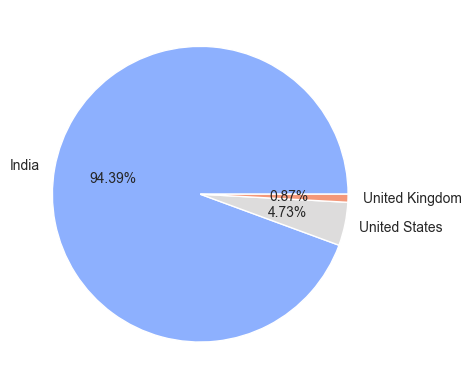

In [629]:
## Top 3 counties that uses zomato
palette = sns.color_palette('coolwarm', 3)

plt.pie(Values[:3],labels=Country_Names[:3],autopct="%1.2f%%",
       textprops={'fontsize':10}, colors=palette)

plt.show()

In [85]:
##Reset Index will reset the by default indexing value from where it is coming
Ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

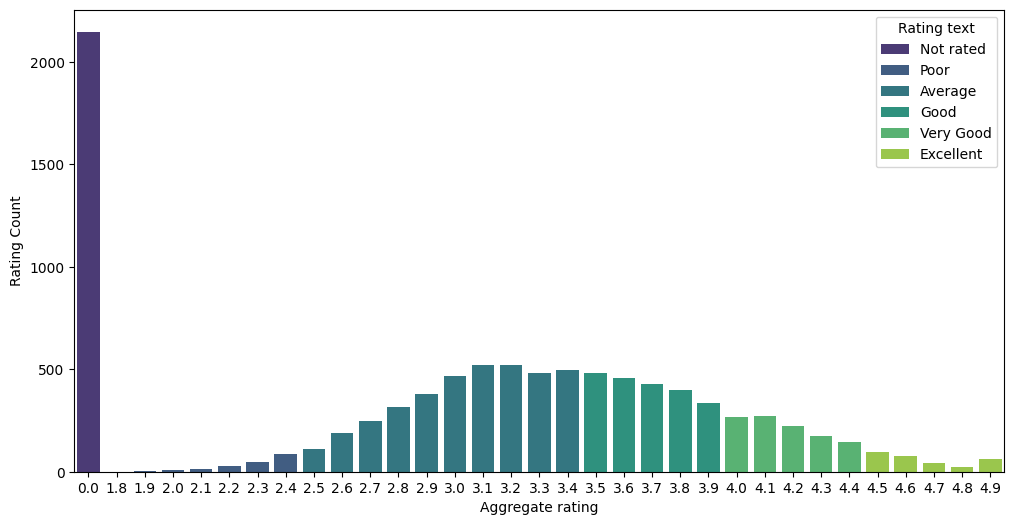

In [82]:
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating", y="Rating Count", hue='Rating text', data=Ratings, palette='viridis')

In [ ]:
## Find the countries name that has given 0 rating ?

In [ ]:
final_df[final_df['Aggregate rating'] == 0.0].groupby(['Country']).size().reset_index().rename(columns={0:"Rating Count"}).head(5)

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [123]:
final_df.groupby(['Aggregate rating', 'Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [ ]:
## Find out which currency is used by which country ?

In [ ]:
final_df.groupby(['Country', 'Currency']).size().reset_index().rename(columns={0:"Count"})

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
## Which Countries do have online deliveries option ?

In [150]:
final_df[final_df['Has Online delivery'] == "Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [157]:
final_df.groupby(['Has Online delivery', 'Country']).size().reset_index().rename(columns={0:"Count"})

,Has Online delivery,Country,Count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [158]:
## Create a pie chart for top 4 cities distribution

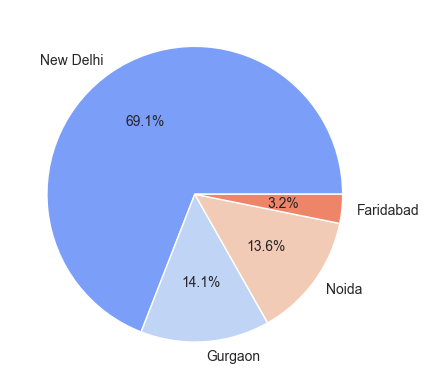

In [620]:
city = final_df.City.value_counts().values
label = final_df.City.value_counts().index

palette = sns.color_palette('coolwarm', 4)

plt.pie(city[:4], labels=label[:4], autopct='%1.1f%%', textprops={'fontsize':10}, colors=palette)
plt.show()

In [174]:
## Find the top 10 Cuisines

In [270]:
final_df.groupby(['Cuisines']).size().reset_index().head(10)

,Cuisines,0
0,Afghani,4
1,"Afghani, Mughlai, Chinese",1
2,"Afghani, North Indian",1
3,"Afghani, North Indian, Pakistani, Arabian",1
4,African,1
5,"African, Portuguese",1
6,American,31
7,"American, Asian, Burger",1
8,"American, Asian, European, Seafood",1
9,"American, Asian, Italian, Seafood",1


In [274]:
Top10CitiesRest = final_df.groupby(['City']).size().reset_index(name='Restaurant ID').sort_values(by='Restaurant ID', ascending=False).head(5)

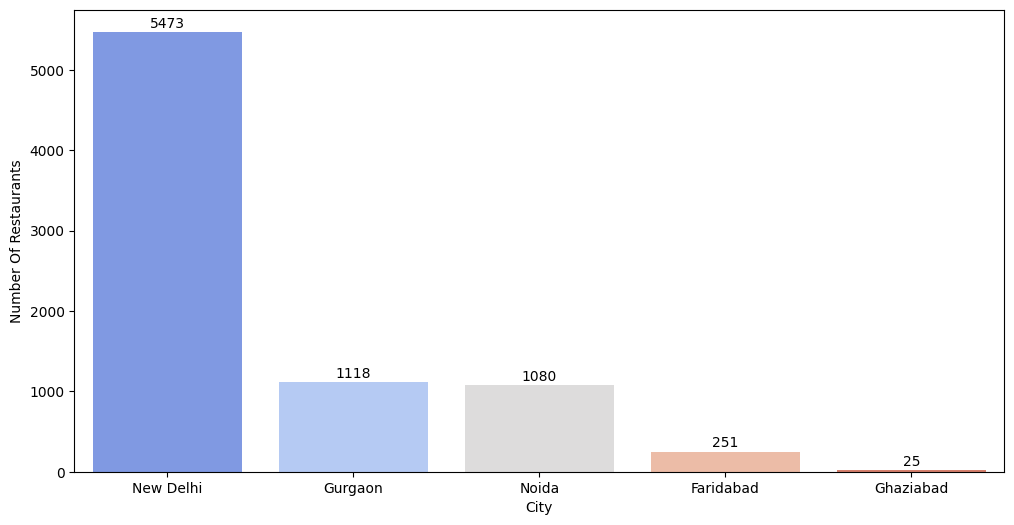

In [335]:
plt.figure(figsize=(12,6))
T10Cities = sns.barplot(y='Restaurant ID', x='City', data=Top10CitiesRest, hue='City', palette='coolwarm')

for container in T10Cities.containers:
    T10Cities.bar_label(container, color='black', padding=1)

plt.ylabel("Number Of Restaurants")
plt.xlabel("City")
plt.show()

In [287]:
## Explode will expand the splitted values into individual rows
cuisines_list = final_df['Cuisines'].str.split(', ').explode()
cuisines_counts = cuisines_list.value_counts().head(10)

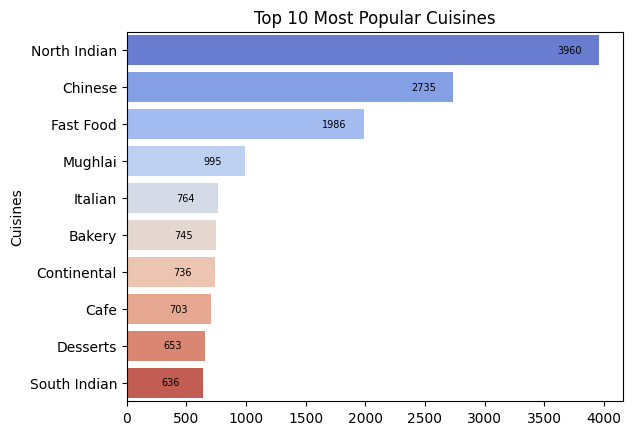

In [334]:
Pop_Cuisines = sns.barplot(x=cuisines_counts.values, y=cuisines_counts.index, hue = cuisines_counts.index, palette = 'coolwarm')

for container in Pop_Cuisines.containers:
    Pop_Cuisines.bar_label(container, fontsize=7, color='black', padding=-30)

plt.title("Top 10 Most Popular Cuisines")
plt.show()

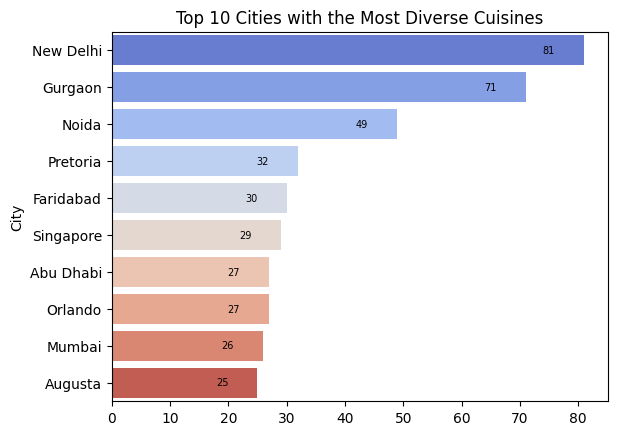

In [328]:
Cities_Cuisines = final_df.groupby('City')['Cuisines'].apply(lambda x: x.str.split(', ').explode().nunique())
top_cuisines_cities = Cities_Cuisines.sort_values(ascending=False).head(10)

Div_Cuisines = sns.barplot(x=top_cuisines_cities.values, y=top_cuisines_cities.index, hue=top_cuisines_cities.index, palette='coolwarm')

for container in Div_Cuisines.containers:
    Div_Cuisines.bar_label(container, color='black', fontsize=7, padding=-30)

plt.title("Top 10 Cities with the Most Diverse Cuisines")
plt.show()

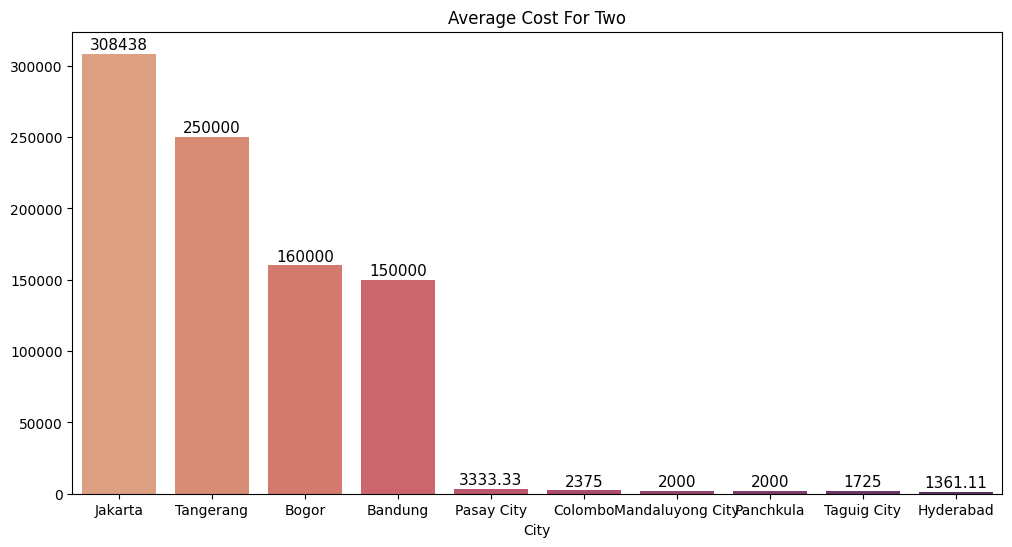

In [380]:
Avg_Cost_By_City = final_df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=Avg_Cost_By_City.index, y=Avg_Cost_By_City.values, hue=Avg_Cost_By_City.index, palette = 'flare')

for container in ax.containers:
    ax.bar_label(container, color='black', fontsize=11, padding=1)

plt.title("Average Cost For Two")
plt.show()

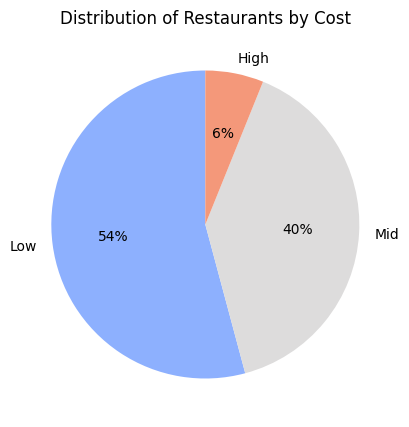

In [470]:
def category(cost):
    if cost < 500:
        return "Low"
    elif 500 <= cost <= 1500:
        return "Mid"
    else:
        return "High"

palette = sns.color_palette('coolwarm',3)

price_category = final_df['Average Cost for two'].apply(category)

price_dist = price_category.value_counts()

plt.figure(figsize=(9,5))
ax = plt.pie(price_dist, labels=price_dist.index, autopct='%1.f%%', startangle=90,
            textprops={'fontsize': 10}, colors=palette)

plt.title("Distribution of Restaurants by Cost")
plt.show()

In [416]:
## To analyze the price distribution across top 6 cities

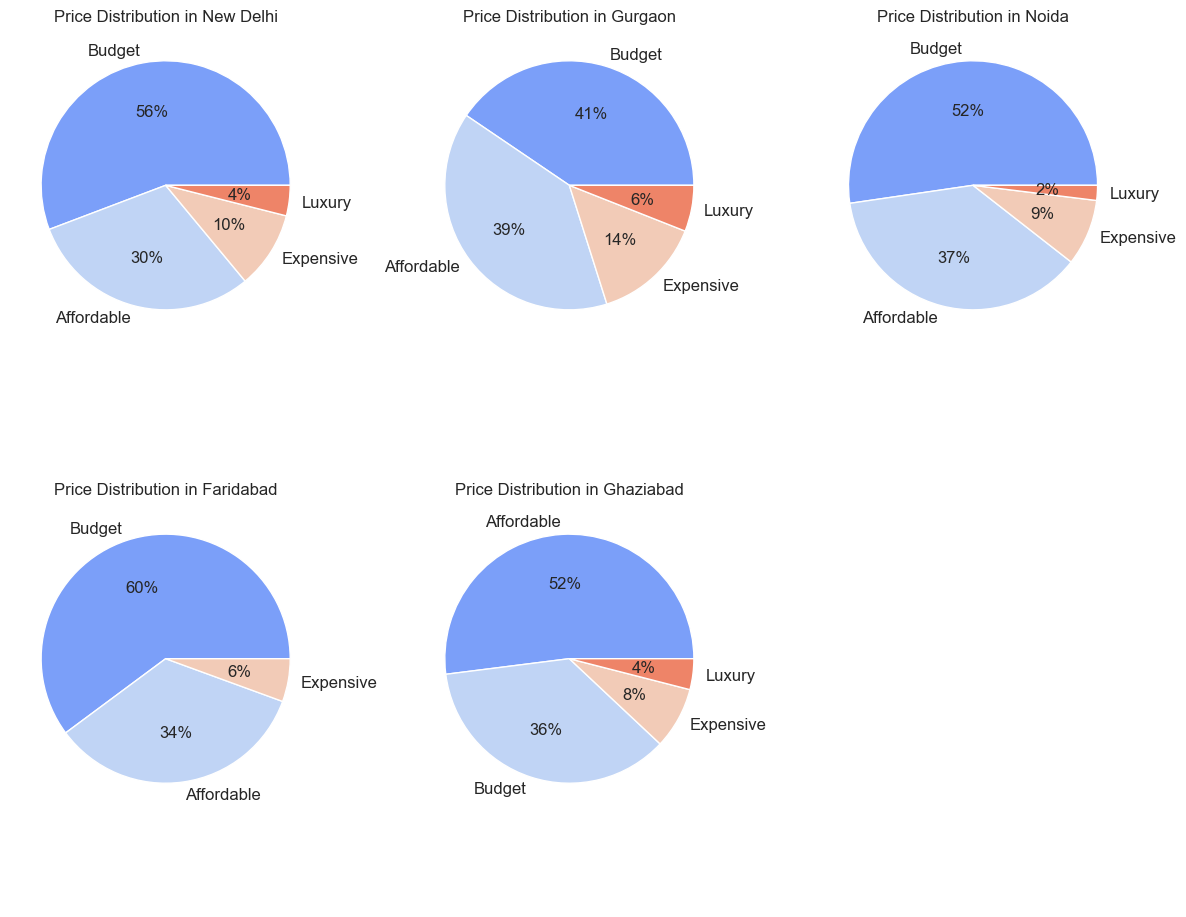

In [525]:
price_labels = {1: "Budget", 2: "Affordable", 3: "Expensive", 4: "Luxury"}

palette = sns.color_palette("coolwarm", 4)

top_cities = final_df['City'].value_counts().head(5).index

fig, grid = plt.subplots(2,3, figsize=(12,10))

ax = grid.flatten()

for i, city in enumerate(top_cities):
    city_data = final_df[final_df['City'] == city]['Price range'].value_counts()

    data_label = city_data.index.map(price_labels)

    ax[i].pie(city_data, labels=data_label, autopct='%1.f%%',
             textprops={'fontsize':12}, colors=palette)

    ax[i].set_title(f"Price Distribution in {city}", fontsize=12)

ax[-1].axis("off")

plt.tight_layout()
plt.show()

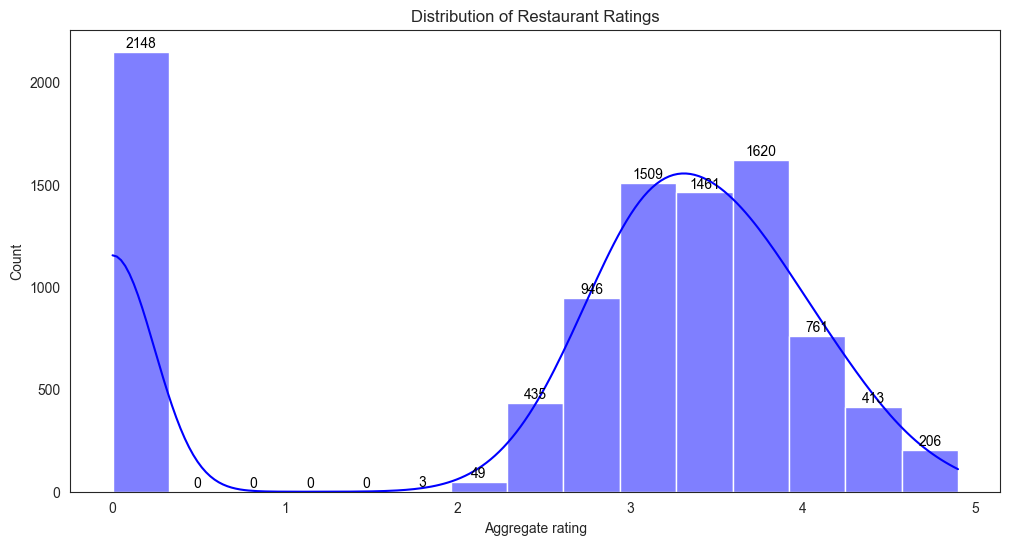

In [595]:
plt.figure(figsize=(12,6))
sns.set_style("white")

Ratings = sns.histplot(final_df['Aggregate rating'], bins=15, kde=True, color="blue")

for container in Ratings.containers:
    Ratings.bar_label(container, color='black', fontsize=10, padding=1) 

plt.title("Distribution of Restaurant Ratings")

plt.grid(False)

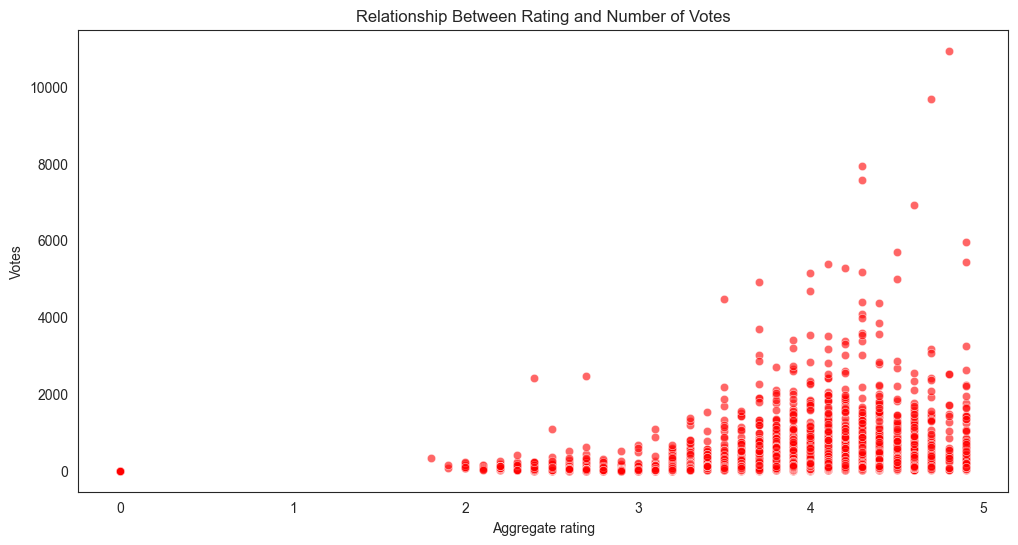

In [593]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=final_df['Aggregate rating'], y=final_df['Votes'], alpha=0.6, color='red')

plt.title("Relationship Between Rating and Number of Votes")

sns.set_style("white")
plt.grid(False)

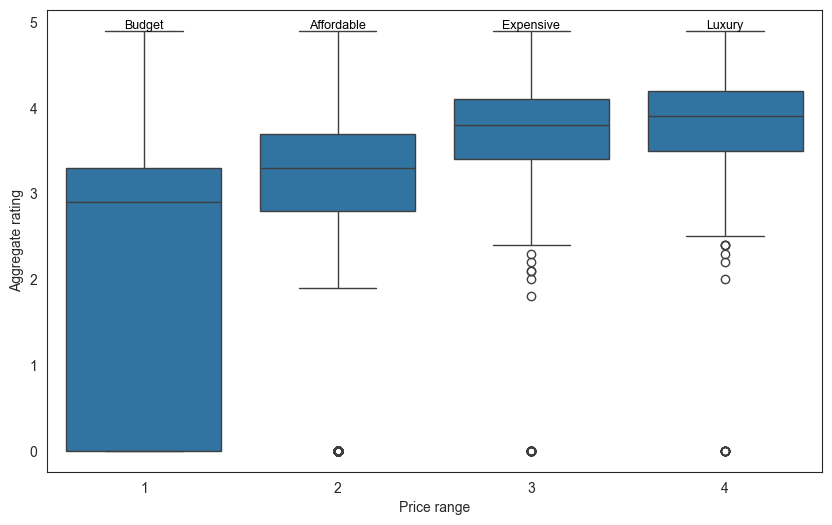

In [555]:
price_category = {1: "Budget", 2: "Affordable", 3: "Expensive", 4: "Luxury"}

plt.figure(figsize=(10,6))
sns.boxplot(x=final_df['Price range'], y=final_df['Aggregate rating'])

for i in range(len(price_category)):
    plt.text(i, final_df['Aggregate rating'].max() + 0.02, price_category[i+1],
            ha='center', fontsize=9, color='black')

sns.set_style("white")
plt.grid(False)

Text(0.5, 1.0, 'Restaurants Offering Online Delivery')

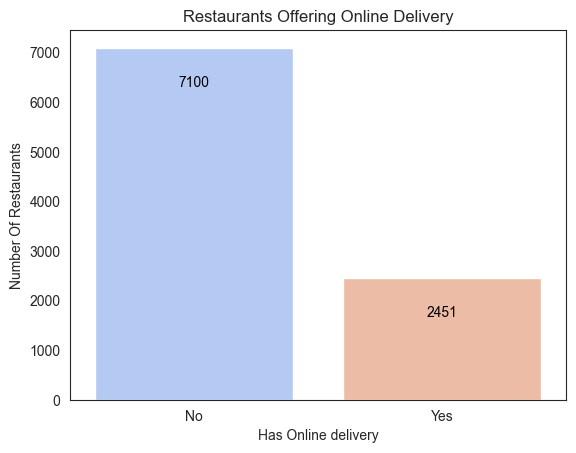

In [619]:
Online_Data = final_df.groupby(['Has Online delivery']).size().reset_index().rename(columns={0:"Number Of Restaurants"})

ax = sns.barplot(x="Has Online delivery", y="Number Of Restaurants", data=Online_Data, hue="Has Online delivery", palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container, color='black', fontsize=10, padding=-30)

plt.title("Restaurants Offering Online Delivery")
plt.show()

Text(0.5, 1.0, 'Restaurants Offering Table Booking')

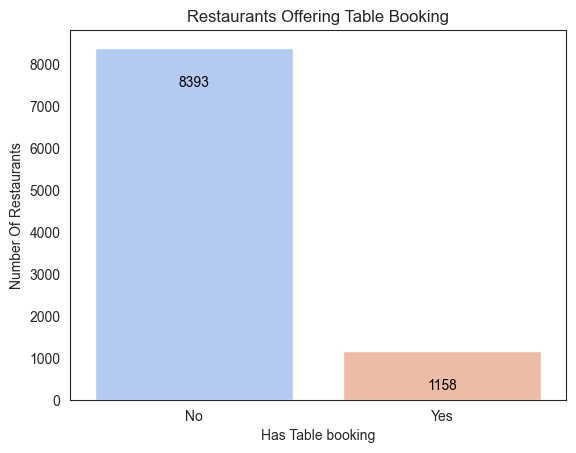

In [612]:
Online_Data = final_df.groupby(['Has Table booking']).size().reset_index().rename(columns={0:"Number Of Restaurants"})

ax = sns.barplot(x="Has Table booking", y="Number Of Restaurants", data=Online_Data, hue="Has Table booking", palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container, color='black', fontsize=10, padding=-30)

plt.title("Restaurants Offering Table Booking")
plt.show()

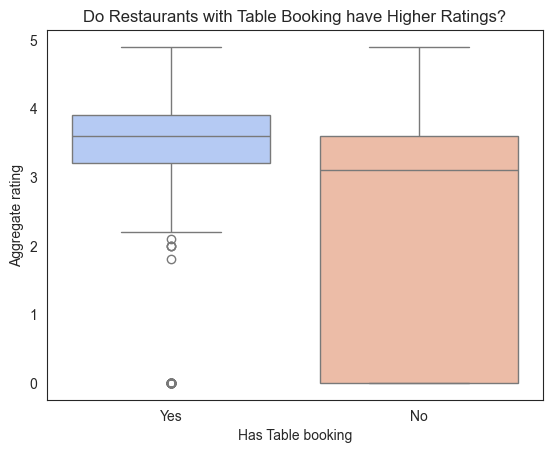

In [618]:
sns.boxplot(x=final_df['Has Table booking'], y=final_df['Aggregate rating'], hue=final_df['Has Table booking'], palette='coolwarm')

plt.title("Do Restaurants with Table Booking have Higher Ratings?")
plt.show()

In [678]:
top5_best_restaurants = final_df[['Restaurant Name', 'City','Aggregate rating','Votes']].sort_values(by=["Aggregate rating", "Votes"],ascending=[False, False]).head(5)

def top5(x):
    return f"{x['Restaurant Name']} ({x['City']}) - ⭐ {x['Aggregate rating']} ({x['Votes']})"

print("Top 5 Best-Rated Restaurants.\nThese restaurants have the highest ratings and a significant number of votes:\n")
print("\n".join(top5_best_restaurants.apply(top5, axis=1)))

Top 5 Best-Rated Restaurants.
These restaurants have the highest ratings and a significant number of votes:

Barbeque Nation (Kolkata) - ⭐ 4.9 (5966)
AB's - Absolute Barbecues (Hyderabad) - ⭐ 4.9 (5434)
Mirchi And Mime (Mumbai) - ⭐ 4.9 (3244)
Naturals Ice Cream (New Delhi) - ⭐ 4.9 (2620)
McGuire's Irish Pub & Brewery (Pensacola) - ⭐ 4.9 (2238)


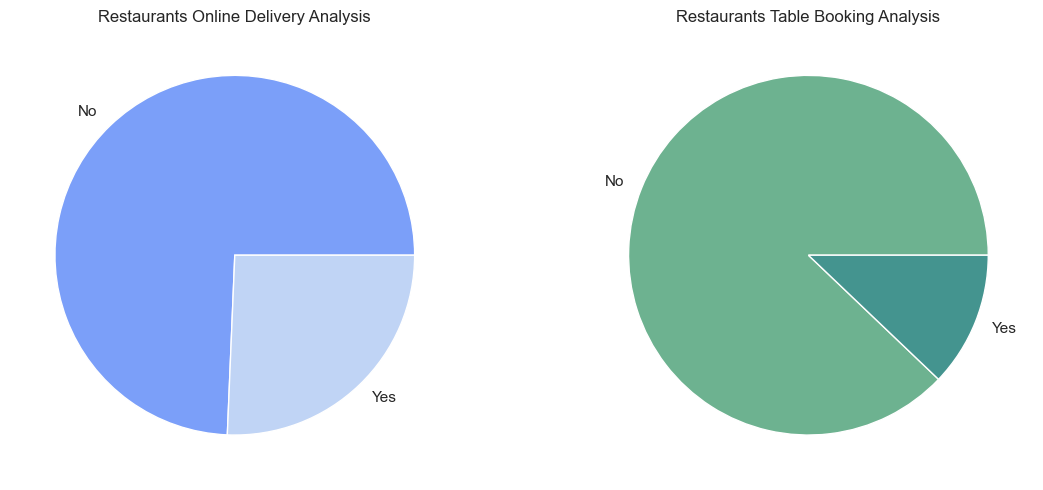

In [701]:
online_delivery = final_df['Has Online delivery'].value_counts()
table_booking = final_df['Has Table booking'].value_counts()

od_palette = sns.color_palette("coolwarm", 4)
tb_palette = sns.color_palette("crest", 4)

fig, grid = plt.subplots(1,2, figsize=(12,5))

grid[0].pie(online_delivery, labels=online_delivery.index, textprops={'fontsize':11}, colors=od_palette)
grid[0].set_title("Restaurants Online Delivery Analysis")

grid[1].pie(table_booking, labels=table_booking.index, textprops={'fontsize':11}, colors=tb_palette)
grid[1].set_title("Restaurants Table Booking Analysis")

plt.tight_layout()
plt.show()

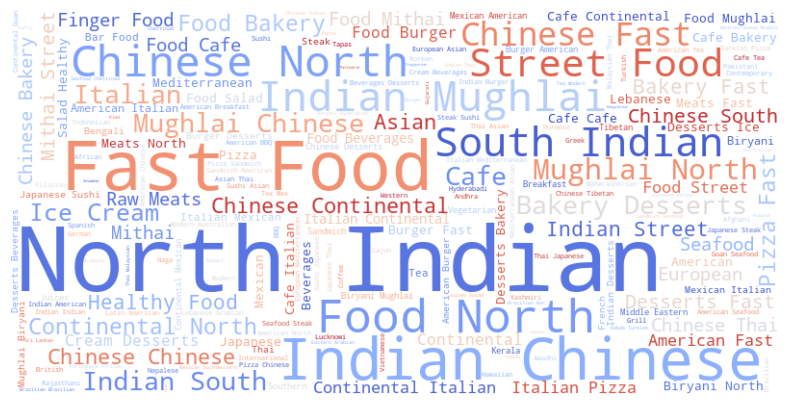

In [718]:
from wordcloud import WordCloud
cuisines = " ".join(final_df['Cuisines'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(cuisines)

plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

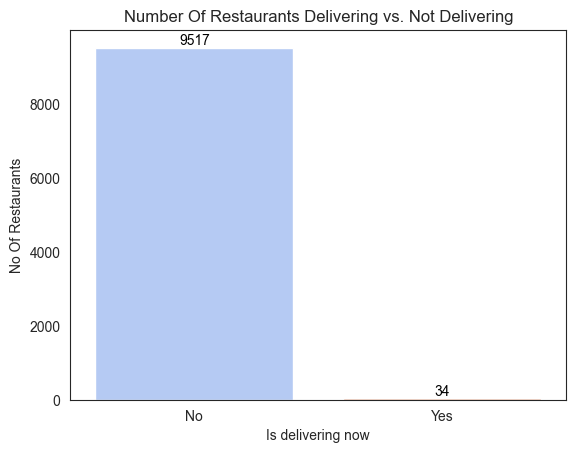

In [740]:
delivery_status = final_df.groupby('Is delivering now').size().reset_index().rename(columns={0: "No Of Restaurants"})

ax = sns.barplot(x="Is delivering now", y="No Of Restaurants", data=delivery_status, hue="Is delivering now", palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container, color='black', padding=0.01)

plt.title("Number Of Restaurants Delivering vs. Not Delivering")
plt.show()

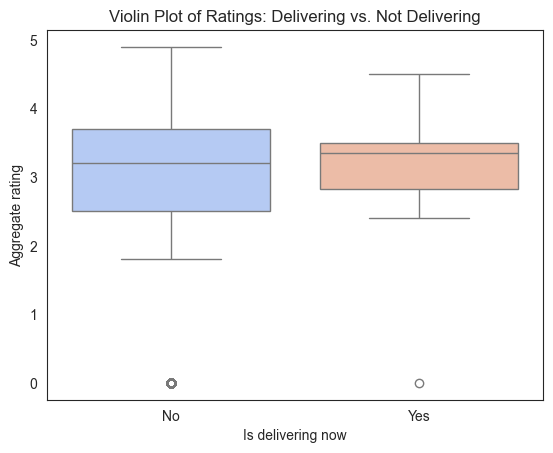

In [747]:
sns.boxplot(x="Is delivering now", y="Aggregate rating", data=final_df, hue="Is delivering now", palette='coolwarm')

plt.title("Box Plot of Ratings: Delivering vs. Not Delivering")
plt.show()

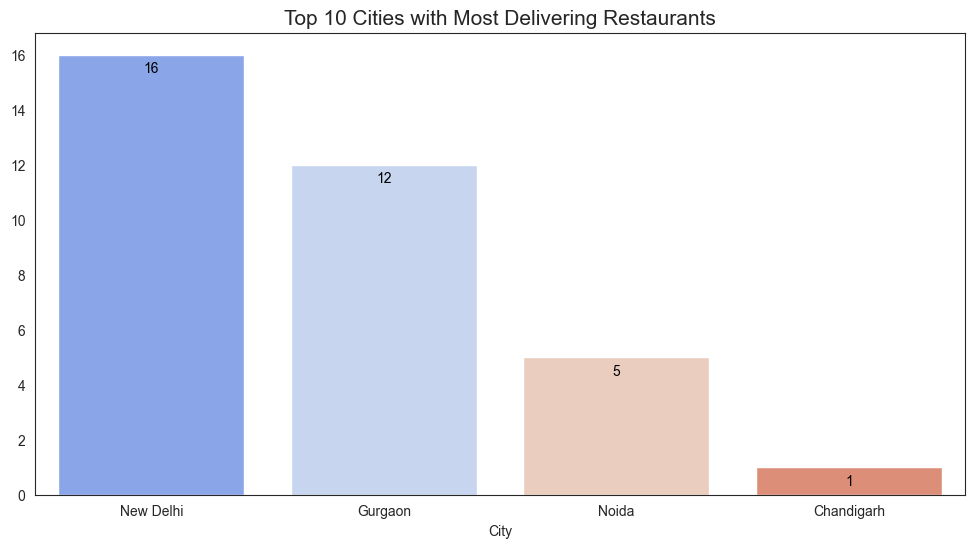

In [758]:
delivering_restaurants = final_df[final_df['Is delivering now'] == 'Yes']

delivering_city = delivering_restaurants['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=delivering_city.index, y=delivering_city.values, hue=delivering_city.index, palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container, color='black', padding=-15)

plt.title("Top 10 Cities with Most Delivering Restaurants", fontsize=15)
plt.show()